In [ ]:
!pip install pandas numpy chardet matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd      # Manipulação de dados
import numpy as np       # Operações numéricas e matrizes
import chardet           # Detecção de encoding de arquivos
import matplotlib.pyplot as plt  # Gráficos e visualizações
import seaborn as sns    # Visualizações avançadas
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV


#### Base de Dados Síflis

In [360]:
data = pd.read_csv("babf2604-06a5-42b9-8038-0ea1d54051fb.csv")
dbh = data[data['ID_MUNICIP'] == "BELO HORIZONTE"]
dbh = dbh[dbh["NU_ANO"] != 2024]
df_agrupado = dbh['NU_ANO'].value_counts().reset_index()
df_agrupado.columns = ['Ano', 'Casos']

In [361]:
print(df_agrupado)

     Ano  Casos
0   2019   1121
1   2018   1100
2   2023    983
3   2017    898
4   2022    818
5   2020    755
6   2016    713
7   2021    658
8   2015    614
9   2014    438
10  2013    314
11  2012    241
12  2011    114
13  2010     94


#### Base de Belo Horizonte

In [362]:
df = pd.read_csv("Dados_BeloHorizonte.csv",encoding="latin1", sep=";")
df = df[df["Ano"] >= 2010]

In [363]:
df.columns

Index(['Ano', 'Índice Mineiro de Responsabilidade Social',
       'Índice Mineiro de Responsabilidade Social - Assistência Social',
       'Índice Mineiro de Responsabilidade Social - Cultura',
       'Índice Mineiro de Responsabilidade Social - Cultura, Esporte, Turismo e Lazer',
       'Índice Mineiro de Responsabilidade Social - Educação',
       'Índice Mineiro de Responsabilidade Social - Esporte, Turismo e Lazer',
       'Índice Mineiro de Responsabilidade Social - Finanças municipais',
       'Índice Mineiro de Responsabilidade Social - Meio Ambiente',
       'Índice Mineiro de Responsabilidade Social - Saneamento, Habitação e Meio Ambiente',
       ...
       'Existência de Conselho de Segurança Pública',
       'Pessoas elegíveis ao Auxílio emergencial',
       'Auxílio emergencial - total',
       'Auxílio emergencial por pessoa elegível', 'Auxílio emergencial - BF',
       'Auxílio emergencial - % BF', 'Transferências totais - BF, BPC e AE',
       'Participação do AE nas tr

In [364]:
#Retira todas as colunas que tem valores null > 3
df.isnull().sum()
df = df.drop(columns=df.columns[df.isnull().sum() > 3])

In [365]:
df.columns

Index(['Ano', 'Taxa de atendimento escolar às crianças de 4 e 5 anos',
       'Taxa de escolarização líquida do Ensino Fundamental',
       'Taxa de crianças que frequentam o Ensino Fundamental na série adequada',
       'Taxa de escolarização líquida do Ensino Médio',
       'Taxa de adolescentes que frequentam o Ensino Médio na série adequada',
       'Total de escolas que oferecem os anos iniciais do Ensino Fundamental Regular',
       'Total de escolas que oferecem os anos finais do Ensino Fundamental Regular',
       'Total de escolas que oferecem o Ensino Fundamental Regular completo',
       'Total de escolas que oferecem o Ensino Médio Regular',
       ...
       'Número de policiais militares',
       'Razão entre homicídios dolosos e policial militar',
       'Habitantes por policial civil ou militar',
       'Habitantes por juiz na comarca',
       'Natureza da unidade policial militar',
       'Existência de unidade prisional',
       'Número de pessoas presas em estabeleci

## MERGE DAS BASES

In [366]:
df_agrupado['Ano'] = df_agrupado['Ano'].astype(str)
df['Ano'] = df['Ano'].astype(str)

df_merged = df_agrupado.merge(df, left_on="Ano", right_on="Ano", how="left")


In [367]:
df.head()

,Ano,Taxa de atendimento escolar às crianças de 4 e 5 anos,Taxa de escolarização líquida do Ensino Fundamental,Taxa de crianças que frequentam o Ensino Fundamental na série adequada,Taxa de escolarização líquida do Ensino Médio,Taxa de adolescentes que frequentam o Ensino Médio na série adequada,Total de escolas que oferecem os anos iniciais do Ensino Fundamental Regular,Total de escolas que oferecem os anos finais do Ensino Fundamental Regular,Total de escolas que oferecem o Ensino Fundamental Regular completo,Total de escolas que oferecem o Ensino Médio Regular,...,Número de policiais militares,Razão entre homicídios dolosos e policial militar,Habitantes por policial civil ou militar,Habitantes por juiz na comarca,Natureza da unidade policial militar,Existência de unidade prisional,Número de pessoas presas em estabelecimento da SEJUSP,Taxa de ocupação penitenciária em estabelecimento da SEJUSP no município.,O município é sede de comarca,Número de médicos por 1000 habitantes
0,2010,"71,43","100,00","87,56","67,44","59,44",678,466,390,257,...,13389.0,"0,05","177,40","13889,77","Sede da 1ª RPM e do 1º, 5º, 13º, 16º, 22º,34º,...",Sim,11805.0,"186,27",Sim,"4,61"
1,2011,"66,47","75,56","69,45","64,87","57,03",663,472,396,261,...,13265.0,"0,06","143,97","11866,60","Sede da 1ª RPM e do 1º, 5º, 13º, 16º, 22º,34º,...",Sim,1954.0,"199,01",Sim,"4,78"
2,2012,"63,56","72,18","66,43","62,90","55,32",653,464,389,264,...,11823.0,"0,07",NaN,"12378,87",1ª RPM,Sim,1370.0,"133,02",Sim,"4,99"
3,2013,"67,48","81,49","78,30","62,60","57,66",650,473,395,262,...,12908.0,"0,06","142,47","11194,12",Diversas Unidades,Sim,1641.0,"87,15",Sim,"5,27"
4,2014,"72,33","82,74","79,94","63,02","58,49",620,470,390,258,...,12921.0,"0,05","137,90","12165,39",Diversas Unidades,Sim,2917.0,"92,76",Sim,"5,57"


### Codificação da base de dados MERGED

##### LabelEncoder

In [368]:
from sklearn.preprocessing import LabelEncoder

# Criar uma cópia do DataFrame
dk = df_merged.copy()

# Garantir que "Ano" seja numérico antes de qualquer transformação
dk["Ano"] = dk["Ano"].astype(int)  # Mantém os anos corretos

# Aplicar LabelEncoder apenas às colunas categóricas (excluindo "Ano")
label_encoders = {}
for col in dk.select_dtypes(include=['object', 'category']).columns:
    if col != "Ano":  
        le = LabelEncoder()
        
        # 🚨 Substituir valores NaN por "MISSING" antes de codificar 🚨
        dk[col] = dk[col].fillna("MISSING")  

        # Aplicar o LabelEncoder
        dk[col] = le.fit_transform(dk[col])

        # Armazena o encoder caso precise reverter depois
        label_encoders[col] = le  

# Checar se ainda há NaN
print("Valores ausentes após Label Encoding:", dk.isnull().sum().sum())

dk.head()


Valores ausentes após Label Encoding: 53


,Ano,Casos,Taxa de atendimento escolar às crianças de 4 e 5 anos,Taxa de escolarização líquida do Ensino Fundamental,Taxa de crianças que frequentam o Ensino Fundamental na série adequada,Taxa de escolarização líquida do Ensino Médio,Taxa de adolescentes que frequentam o Ensino Médio na série adequada,Total de escolas que oferecem os anos iniciais do Ensino Fundamental Regular,Total de escolas que oferecem os anos finais do Ensino Fundamental Regular,Total de escolas que oferecem o Ensino Fundamental Regular completo,...,Número de policiais militares,Razão entre homicídios dolosos e policial militar,Habitantes por policial civil ou militar,Habitantes por juiz na comarca,Natureza da unidade policial militar,Existência de unidade prisional,Número de pessoas presas em estabelecimento da SEJUSP,Taxa de ocupação penitenciária em estabelecimento da SEJUSP no município.,O município é sede de comarca,Número de médicos por 1000 habitantes
0,2019,1121,12,11,9,6,8,642,435,354,...,11704.0,0,7,6,4,1,1754.0,4,2,9
1,2018,1100,10,10,8,10,10,627,444,364,...,11665.0,1,5,5,1,0,NaN,11,2,8
2,2023,983,0,0,11,12,11,610,434,356,...,NaN,5,11,11,3,0,NaN,11,0,13
3,2017,898,9,7,5,9,9,622,462,377,...,12098.0,1,3,7,5,1,3082.0,6,1,7
4,2022,818,13,0,11,13,11,622,433,358,...,NaN,5,11,11,3,0,NaN,11,0,12


### CORRELAÇÃO

##### Pearson

In [370]:
correlation_matrix = dk.corr()
correlations = correlation_matrix["Casos"]

strong_correlations = correlations[correlations.abs() > 0.5].sort_values(ascending=False)

print(strong_correlations)


Casos                                                                                                   1.000000
Valor Adicionado Fiscal (VAF) dos serviços industriais de utilidade pública                             0.910365
Taxa de atendimento escolar das crianças de 0 a 3 anos de idade                                         0.899054
Participação da administração pública no Valor Adicionado                                               0.897157
Deficientes beneficiados pelo BPC                                                                       0.893572
                                                                                                          ...   
Percentual de matrículas no Ensino Fundamental em estabelecimentos da rede estadual                    -0.887226
Percentual de matrículas no Ensino Médio em estabelecimentos da rede municipal                         -0.890725
Taxa de alunos em escolas com laboratório de informática - Ensino Médio                         

##### Spearman

In [371]:
correlation_matrix = dk.corr(method="spearman")
correlations = correlation_matrix["Casos"]

strong_correlations = correlations[correlations.abs() > 0.5].sort_values(ascending=False)

print(strong_correlations)


Casos                                                                                                   1.000000
Valor Adicionado Fiscal (VAF) dos serviços industriais de utilidade pública                             0.903297
Deficientes beneficiados pelo BPC                                                                       0.903297
Taxa de atendimento escolar das crianças de 0 a 3 anos de idade                                         0.903297
Participação da administração pública no Valor Adicionado                                               0.891090
                                                                                                          ...   
Número de ocorrências de Porte ilegal de arma de fogo                                                  -0.890909
Percentual de matrículas no Ensino Fundamental em estabelecimentos da rede estadual                    -0.894048
Percentual de matrículas na Educação Infantil em estabelecimentos da rede estadual              

##### RANDON FOREST

In [372]:
dk.head()



,Ano,Casos,Taxa de atendimento escolar às crianças de 4 e 5 anos,Taxa de escolarização líquida do Ensino Fundamental,Taxa de crianças que frequentam o Ensino Fundamental na série adequada,Taxa de escolarização líquida do Ensino Médio,Taxa de adolescentes que frequentam o Ensino Médio na série adequada,Total de escolas que oferecem os anos iniciais do Ensino Fundamental Regular,Total de escolas que oferecem os anos finais do Ensino Fundamental Regular,Total de escolas que oferecem o Ensino Fundamental Regular completo,...,Número de policiais militares,Razão entre homicídios dolosos e policial militar,Habitantes por policial civil ou militar,Habitantes por juiz na comarca,Natureza da unidade policial militar,Existência de unidade prisional,Número de pessoas presas em estabelecimento da SEJUSP,Taxa de ocupação penitenciária em estabelecimento da SEJUSP no município.,O município é sede de comarca,Número de médicos por 1000 habitantes
0,2019,1121,12,11,9,6,8,642,435,354,...,11704.0,0,7,6,4,1,1754.0,4,2,9
1,2018,1100,10,10,8,10,10,627,444,364,...,11665.0,1,5,5,1,0,NaN,11,2,8
2,2023,983,0,0,11,12,11,610,434,356,...,NaN,5,11,11,3,0,NaN,11,0,13
3,2017,898,9,7,5,9,9,622,462,377,...,12098.0,1,3,7,5,1,3082.0,6,1,7
4,2022,818,13,0,11,13,11,622,433,358,...,NaN,5,11,11,3,0,NaN,11,0,12


In [373]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Separar X e y corretamente antes de normalizar
X = dk.drop(columns=["Casos"])
y = dk["Casos"]

# Converter Ano para numérico adequado
X["Ano"] = X["Ano"].astype(int) - X["Ano"].min()

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Criar DataFrame dos anos futuros
anos_futuros = list(range(2025, 2030))
# Criar um DataFrame com as mesmas colunas de X_train
X_futuro = pd.DataFrame(columns=X_train.columns)

# Preencher a coluna "Ano" com os anos futuros
X_futuro["Ano"] = [ano - X["Ano"].min() for ano in anos_futuros]

# Para as demais colunas, preencher com a média dos valores históricos
for col in X_train.columns:
    if col != "Ano":
        X_futuro[col] = X_train[col].mean()  # Preenchendo com a média histórica

# Garantir que os tipos de dados sejam os mesmos
X_futuro = X_futuro.astype(X_train.dtypes)

# Fazer previsões para os anos futuros
previsoes_futuras = rf.predict(X_futuro)

# Criar DataFrame de saída
df_previsoes = pd.DataFrame({
    "Ano": anos_futuros,
    "Previsão de Casos": previsoes_futuras
})

print(df_previsoes)



MAE: 152.46
MSE: 39819.91
RMSE: 199.55
    Ano  Previsão de Casos
0  2025              749.1
1  2026              749.1
2  2027              749.1
3  2028              749.1
4  2029              749.1


##### ARIMA

     Ano  Previsão de Casos
14  2024         926.352618
15  2025         851.135772
16  2026         889.508464
17  2027         963.024460
18  2028         951.094442
19  2029         899.895287


c:\Users\mathe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mathe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mathe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mathe\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\mathe\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Predi

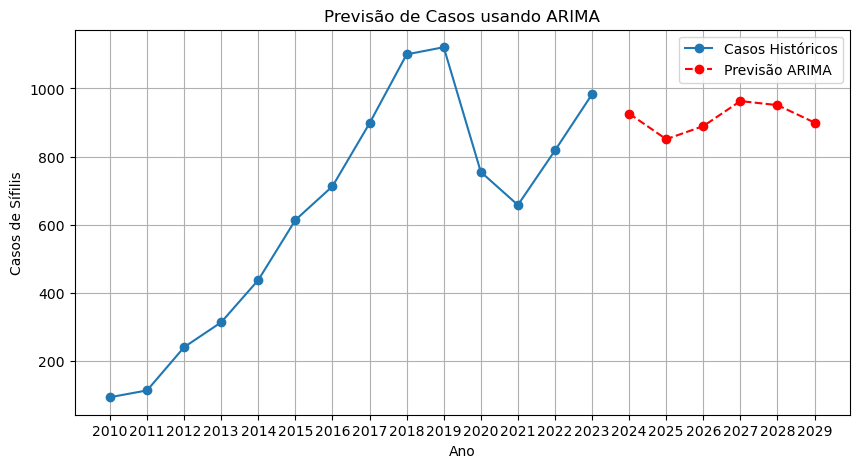

In [374]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ordenar os dados por Ano
df_temporal = dk[["Ano", "Casos"]].sort_values(by="Ano")

# Definir o modelo ARIMA (parâmetros ajustáveis)
modelo = ARIMA(df_temporal["Casos"], order=(5,1,0))  # (p,d,q) - ajustar esses valores
modelo_fit = modelo.fit()

# Fazer previsões para os anos futuros
anos_futuros = list(range(2024, 2030))
previsoes_futuras = modelo_fit.forecast(steps=len(anos_futuros))

# Criar DataFrame com previsões
df_previsoes_arima = pd.DataFrame({
    "Ano": anos_futuros,
    "Previsão de Casos": previsoes_futuras
})

# Mostrar previsões
print(df_previsoes_arima)

# Plotando a série temporal
plt.figure(figsize=(10, 5))
plt.plot(df_temporal["Ano"], df_temporal["Casos"], label="Casos Históricos", marker='o')
plt.plot(df_previsoes_arima["Ano"], df_previsoes_arima["Previsão de Casos"], 
         label="Previsão ARIMA", linestyle="dashed", marker='o', color='red')

# Definir os ticks do eixo X para serem anuais
plt.xticks(ticks=range(df_temporal["Ano"].min(), df_previsoes_arima["Ano"].max() + 1, 1))

# Personalizar o gráfico
plt.xlabel("Ano")
plt.ylabel("Casos de Sífilis")
plt.title("Previsão de Casos usando ARIMA")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
